In [1]:
from typing import Any, Callable, Sequence
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from maze_dataset import MazeDataset, MazeDatasetConfig
from maze_dataset.generation import LatticeMazeGenerators
from maze_dataset.benchmark.percolation_fractions import SweepResult, full_analysis, dataset_success_fraction

In [2]:
# magic auto-reload
%load_ext autoreload
%autoreload

100%|██████████| 3/3 [00:01<00:00,  1.61it/s]


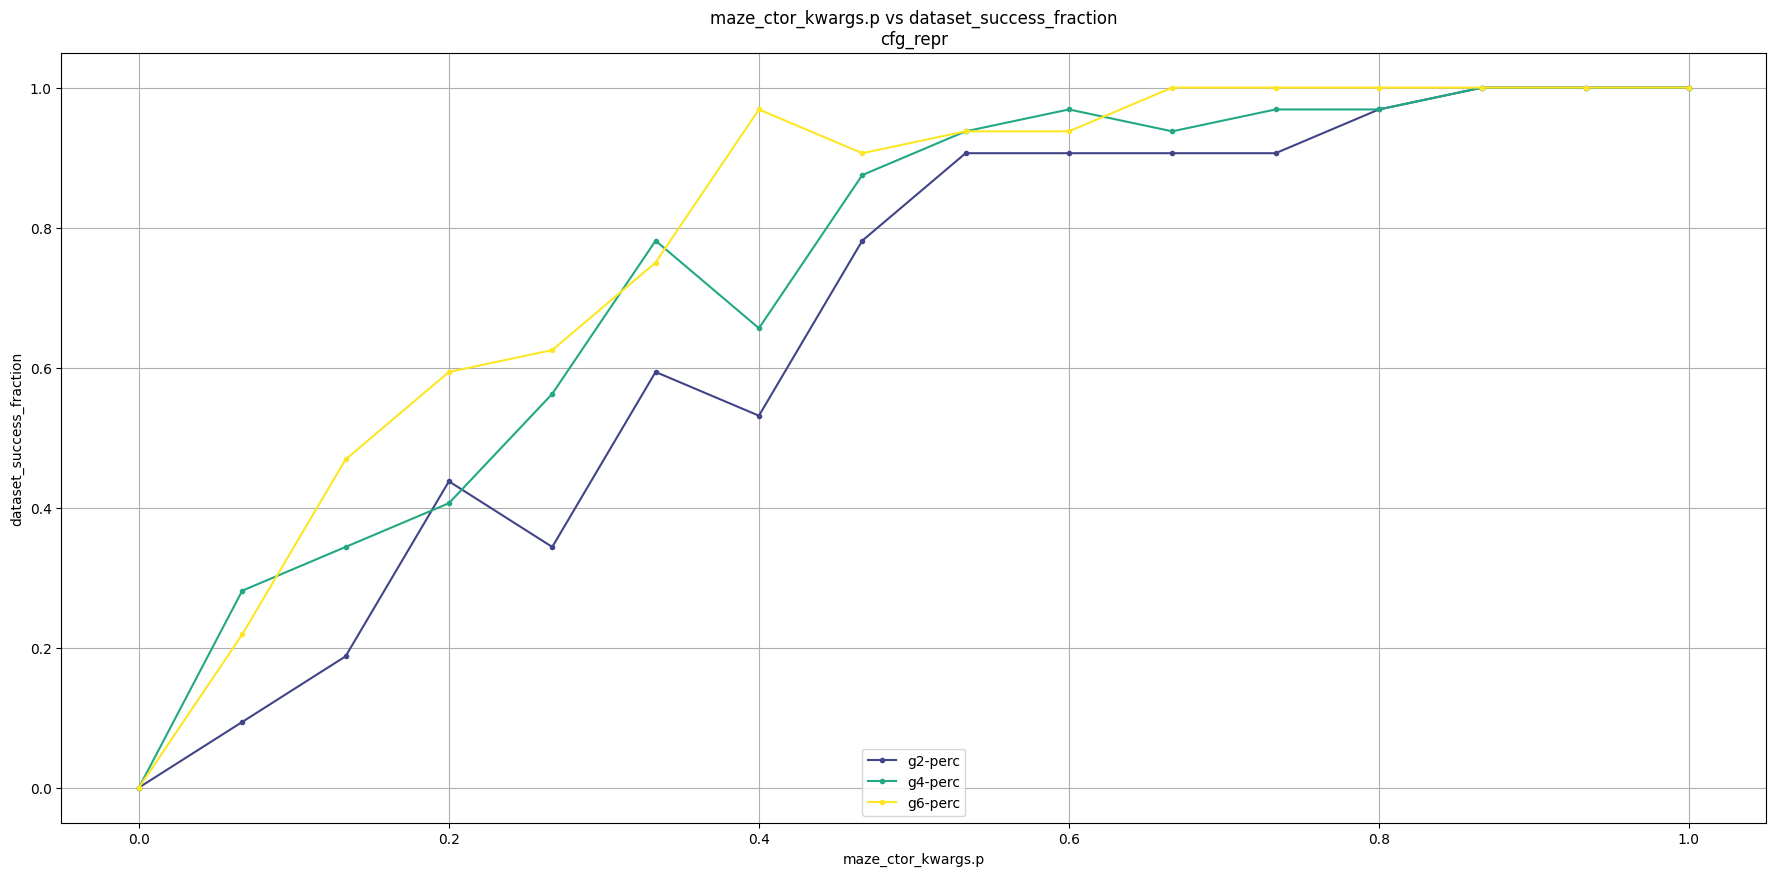

<Axes: title={'center': 'maze_ctor_kwargs.p vs dataset_success_fraction\ncfg_repr'}, xlabel='maze_ctor_kwargs.p', ylabel='dataset_success_fraction'>

In [3]:
# Run the analysis
results: SweepResult = SweepResult.analyze(
    configs=[
        MazeDatasetConfig(
            name=f"g{grid_n}-perc",
            grid_n=grid_n,
            n_mazes=32,
            maze_ctor=LatticeMazeGenerators.gen_percolation,
            maze_ctor_kwargs=dict(),
            endpoint_kwargs=dict(
                deadend_start=False,
                deadend_end=False,
                endpoints_not_equal=False,
                except_on_no_valid_endpoint=False,
            ),
        )
        for grid_n in [2, 4, 6]
    ],
    param_values=np.linspace(0.0, 1.0, 16).tolist(),
	param_key="maze_ctor_kwargs.p",
	analyze_func=dataset_success_fraction,
	parallel=False,
)

# Plot results
results.plot(
    save_path=None, cfg_keys=["n_mazes", "endpoint_kwargs"]
)

In [4]:
import tqdm
import time

def f(x):
	time.sleep(0.01)
	return x


def do_map_serial(
    func, 
    iterable,
):
    """Generator version of map to ensure streaming behavior."""
    for item in iterable:
        yield func(item)
        
do_map = do_map_serial

x = list(tqdm.tqdm(do_map(f, range(100)), total=100))

len(x)

100%|██████████| 100/100 [00:01<00:00, 95.18it/s]


100

In [5]:
print(results.configs_shared())
print(results.configs_differing_keys())

{'__muutils_format__': 'MazeDatasetConfig(SerializableDataclass)', 'seq_len_min': 1, 'seq_len_max': 512, 'seed': 42, 'applied_filters': [], 'n_mazes': 32, 'maze_ctor': {'__name__': 'gen_percolation', '__module__': 'maze_dataset.generation.generators', '__doc__': ['generate a lattice maze using simple percolation', '', '        note that p in the range (0.4, 0.7) gives the most interesting mazes', '', '        # Arguments', '        - `grid_shape: Coord`: the shape of the grid', '        - `lattice_dim: int`: the dimension of the lattice (default: `2`)', '        - `p: float`: the probability of a cell being accessible (default: `0.5`)', '        - `start_coord: Coord | None`: the starting coordinate for the connected component (default: `None` will give a random start)', '        '], 'source_code': ['    @staticmethod', '    def gen_percolation(', '        grid_shape: Coord,', '        p: float = 0.4,', '        lattice_dim: int = 2,', '        start_coord: Coord | None = None,', '    



# Analyzing 1/6: endpoint_kwargs 'any', gen_func=gen_percolation




TypeError: SweepResult.analyze() missing 2 required positional arguments: 'param_key' and 'analyze_func'

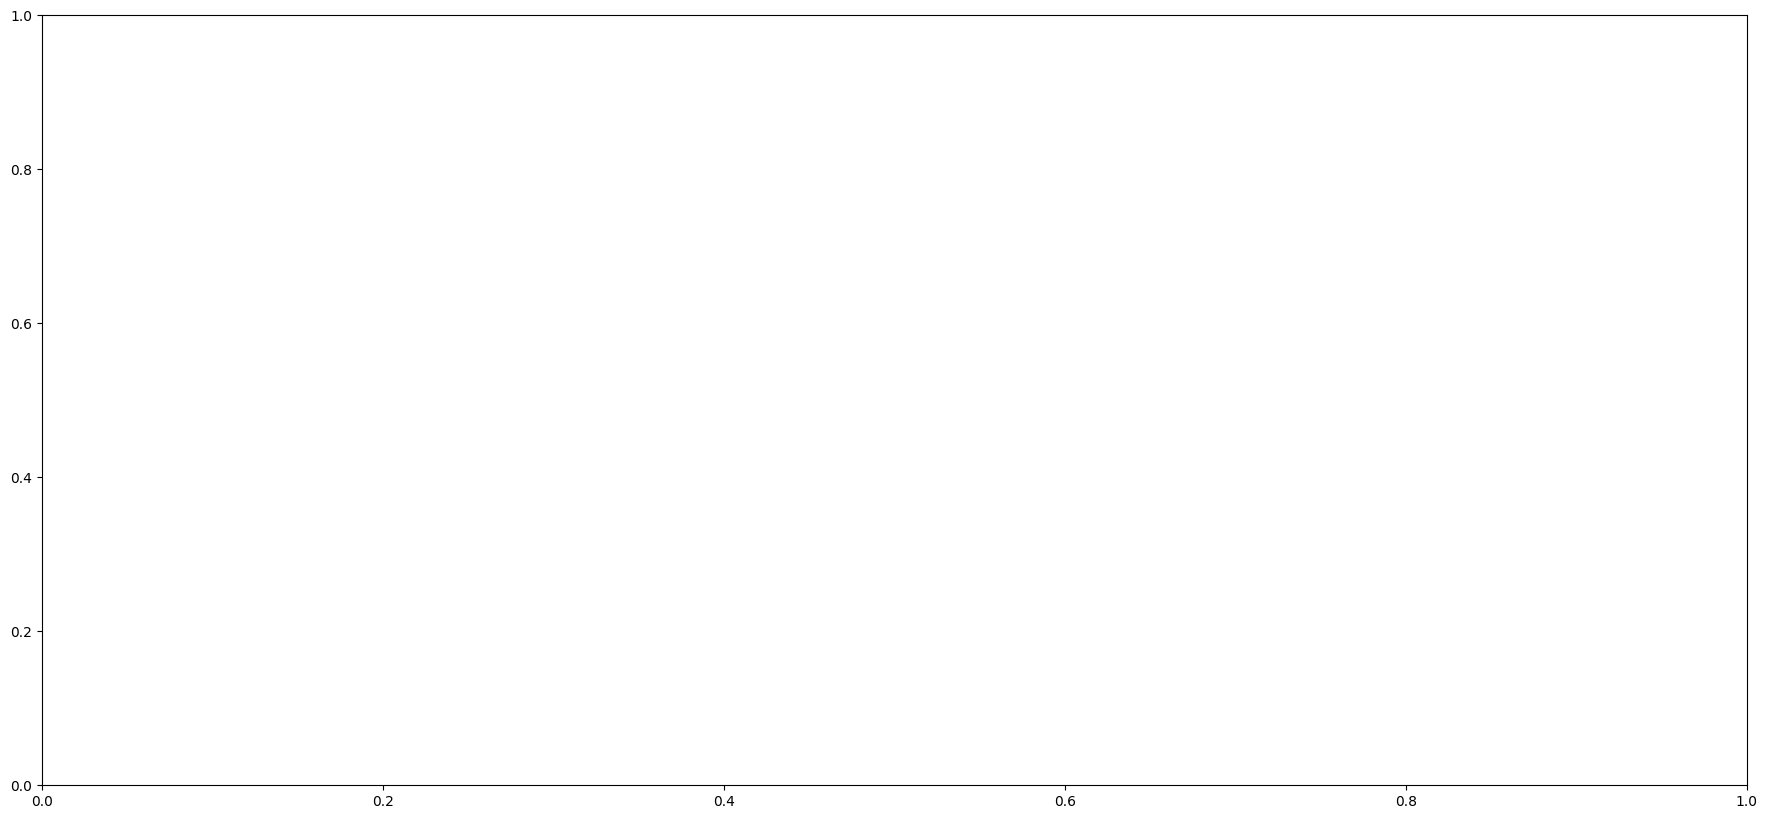

In [6]:
full_analysis(
    n_mazes=32,
    p_val_count=16,
    grid_sizes=[2, 4, 6],
)